In [1]:
%run init.ipynb

# $Z$-, $X$-, $Y$- and Bell's basis

In [2]:
def mbk_xyzBB(matrix, *bpos):
    base = [t[0] for t in bpos]
    lst = [t[1:] for t in bpos]
    matrix_aux = copy.deepcopy(matrix)
    for j in range(len(base)):
        if base[j] == 'x' or base[j] == 'y':
            for k in range(len(lst[j])):
                matrix_aux = xyzBasis(matrix_aux, lst[j][k], base=base[j])
        elif base[j] == 'BB':
            for k in range(len(lst[j])):
                matrix_aux = BBasis(matrix_aux, lst[j][k])
    val, poss, poss_bin, order = [], [], [], [[]]
    if isinstance(matrix_aux, sympy.matrices.dense.MutableDenseMatrix):
        n_linhas, n_colunas = matrix_aux.shape
        if n_colunas == 1:
            Psi = 0
            x = len(matrix_aux)
            n = int(math.log(x)/math.log(2))
            for i in range(x):
                if matrix_aux[i] != 0:
                    val.append(matrix_aux[i])
                    poss_bin.append(format(i, f'0{int(math.log(x)/math.log(2))}b'))
            for i in range(len(base)):
                for j in range(len(val)):
                    order = []
                    for k in range(len(lst[i])):
                        if base[i] == 'x':
                            if poss_bin[j][n-1-lst[i][k]] == str('0'):
                                order.append(poss_bin[j][:n-1-lst[i][k]] + 'a' + poss_bin[j][n-lst[i][k]:])
                            elif poss_bin[j][n-1-lst[i][k]] == str('1'):
                                order.append(poss_bin[j][:n-1-lst[i][k]] + 'b' + poss_bin[j][n-lst[i][k]:])
                        if base[i] == 'y':
                            if poss_bin[j][n-1-lst[i][k]] == str('0'):
                                order.append(poss_bin[j][:n-1-lst[i][k]] + 'c' + poss_bin[j][n-lst[i][k]:])
                            elif poss_bin[j][n-1-lst[i][k]] == str('1'):
                                order.append(poss_bin[j][:n-1-lst[i][k]] + 'd' + poss_bin[j][n-lst[i][k]:])
                        if base[i] == 'BB':
                            if poss_bin[j][n-1-lst[i][k][0]] == str('0') and poss_bin[j][n-1-lst[i][k][1]] == str('0'):
                                order.append(poss_bin[j][:n-1-lst[i][k][0]] + 'PP' + poss_bin[j][n-lst[i][k][1]:])
                            if poss_bin[j][n-1-lst[i][k][0]] == str('1') and poss_bin[j][n-1-lst[i][k][1]] == str('1'):
                                order.append(poss_bin[j][:n-1-lst[i][k][0]] + 'QQ' + poss_bin[j][n-lst[i][k][1]:])
                            if poss_bin[j][n-1-lst[i][k][0]] == str('0') and poss_bin[j][n-1-lst[i][k][1]] == str('1'):
                                order.append(poss_bin[j][:n-1-lst[i][k][0]] + 'RR' + poss_bin[j][n-lst[i][k][1]:])
                            if poss_bin[j][n-1-lst[i][k][0]] == str('1') and poss_bin[j][n-1-lst[i][k][1]] == str('0'):
                                order.append(poss_bin[j][:n-1-lst[i][k][0]] + 'SS' + poss_bin[j][n-lst[i][k][1]:])
                        if k < len(lst):
                            poss_bin.pop(j)
                            poss_bin.insert(j,order[k])
                    if i == len(base)-1:
                        string = order[-1]
                        string = string.replace("a", "+").replace("b", "-")\
                                .replace("c", "\oplus").replace("d", "\ominus")\
                                .replace("PP", "\Phi_{+}").replace("QQ", "\Phi_{-}")\
                                .replace("RR", "\Psi_{+}").replace("SS", "\Psi_{-}")
                        Psi += val[j]*Ket(string)
            return Psi

In [3]:
def xyzBasis(matrix, *pos, base='x'):
    lst = list(pos)
    x = len(matrix)
    n = int(log(x, 2))
    psi_mod = copy.deepcopy(matrix)
    psi_f = Matrix([0]*2**n)
    for j in range(x):
        char = list('{:0{}b}'.format(j, math.ceil(math.log(x, 2))))
        if base == 'x':
            plus =  (1/sqrt(2)) * (pbk(''.join(char[:n-1-lst[0]]) + '0' + ''.join(char[n-lst[0]:]))\
                                 + pbk(''.join(char[:n-1-lst[0]]) + '1' + ''.join(char[n-lst[0]:])))
            minus = (1/sqrt(2)) * (pbk(''.join(char[:n-1-lst[0]]) + '0' + ''.join(char[n-lst[0]:]))\
                                 - pbk(''.join(char[:n-1-lst[0]]) + '1' + ''.join(char[n-lst[0]:])))
        if base == 'y':
            plus  =  (1/sqrt(2)) * (pbk(''.join(char[:n-1-lst[0]]) + '0' + ''.join(char[n-lst[0]:]))\
                                  + pbk(''.join(char[:n-1-lst[0]]) + '1' + ''.join(char[n-lst[0]:])))
            minus =  (-1j/sqrt(2))*(pbk(''.join(char[:n-1-lst[0]]) + '0' + ''.join(char[n-lst[0]:]))\
                                  - pbk(''.join(char[:n-1-lst[0]]) + '1' + ''.join(char[n-lst[0]:])))
        if char[n-1-lst[0]] == str(0):
            #print('1st')
            psi_f = psi_mod[j] * plus + psi_f
            psi_mod[j] = 0
        if char[n-1-lst[0]] == str(1):
            #print('2nd')
            psi_f = psi_mod[j] * minus + psi_f
            psi_mod[j] = 0
    psi_f = psi_f + psi_mod
    return psi_f

In [4]:
def BBasis(matrix, *pos):
    lst = list(pos)
    x = len(matrix)
    n = int(log(x, 2))
    psi_mod = copy.deepcopy(matrix)
    psi_f = Matrix([0]*2**n)
    for j in range(x):
        char = list('{:0{}b}'.format(j, math.ceil(math.log(x, 2))))
        # 00 = phi_plus, 01 = phi_minus, 10 = psi_plus, 11 = psi_minus
        phi_plus = (1/sqrt(2)) * (pbk(''.join(char[:n-1-lst[0][0]]) + '00' + ''.join(char[n-lst[0][1]:]))\
                          + pbk(''.join(char[:n-1-lst[0][0]]) + '11' + ''.join(char[n-lst[0][1]:])))
        phi_minus = (1/sqrt(2)) * (pbk(''.join(char[:n-1-lst[0][0]]) + '00' + ''.join(char[n-lst[0][1]:]))\
                          - pbk(''.join(char[:n-1-lst[0][0]]) + '11' + ''.join(char[n-lst[0][1]:])))
        psi_plus = (1/sqrt(2)) * (pbk(''.join(char[:n-1-lst[0][0]]) + '01' + ''.join(char[n-lst[0][1]:]))\
                          + pbk(''.join(char[:n-1-lst[0][0]]) + '10' + ''.join(char[n-lst[0][1]:])))
        psi_minus = (1/sqrt(2)) * (pbk(''.join(char[:n-1-lst[0][0]]) + '01' + ''.join(char[n-lst[0][1]:]))\
                          - pbk(''.join(char[:n-1-lst[0][0]]) + '10' + ''.join(char[n-lst[0][1]:])))
        if char[n-1-lst[0][0]] == str(0) and char[n-1-lst[0][1]] == str(0):
            psi_f = psi_mod[j] * phi_plus + psi_f
            psi_mod[j] = 0
        if char[n-1-lst[0][0]] == str(1) and char[n-1-lst[0][1]] == str(1):
            psi_f = psi_mod[j] * phi_minus + psi_f
            psi_mod[j] = 0
        if char[n-1-lst[0][0]] == str(0) and char[n-1-lst[0][1]] == str(1):
            psi_f = psi_mod[j] * psi_plus + psi_f
            psi_mod[j] = 0
        if char[n-1-lst[0][0]] == str(1) and char[n-1-lst[0][1]] == str(0):
            psi_f = psi_mod[j] * psi_minus + psi_f
            psi_mod[j] = 0
    psi_f = psi_f + psi_mod
    return psi_f

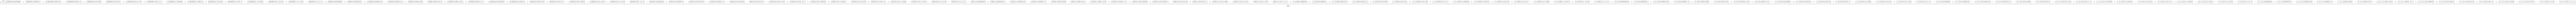

In [7]:
ψ = (1/sqrt(2))*(pbk('P+Rr-l1') + pbk('P-Rl+r0'))
mysim(mbk(ψ))

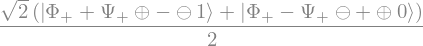

In [16]:
mysim(mbk_xyzBB( ψ, ('y', 3, 1), ('BB', (8,7), (5,4)), ('x', 6, 2)))